## ESTADISTICA II

Happy coding 📊📈📉

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('instagram_global_top_1000.csv')


### 1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

 Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

`Como en el pair de  Estadistica I hacemos analisis de variables numéricas, en este pair, analizaremos las categóricas`

`Vamos a analizar, los seguidores por pais, valorando seguimientos e interacciones en la app.`
`Nos generamos una consulta de variables numéricas enfrentadas por paises.`

In [5]:
df['audience_country'].unique() # Vemos los valores unicos de la columna de paises.

array(['India', 'United States', 'Argentina', 'Brazil', 'Indonesia',
       'Iran', nan, 'France', 'Mexico', 'Russia', 'South Korea', 'Egypt',
       'Turkey', 'Spain', 'Italy', 'China', 'Colombia', 'United Kingdom',
       'Poland', 'Nigeria', 'Thailand', 'Philippines', 'Saudi Arabia',
       'Morocco', 'United Arab Emirates', 'Iraq', 'Germany', 'Algeria',
       'Syria', 'Kazakhstan', 'Japan', 'Chile'], dtype=object)

In [6]:
df2=df.groupby(['audience_country'])['followers','authentic_engagement','engagement_avg'].sum()
df2 # Generamos un nuevo DataFrame con la agrupacion de los datos por paises.

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_41787/2502027673.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby(['audience_country'])['followers','authentic_engagement','engagement_avg'].sum()


,followers,authentic_engagement,engagement_avg
audience_country,,,
Algeria,8.200000e+06,419200.0,539900.0
Argentina,6.365000e+08,16238000.0,24583200.0
Brazil,3.588600e+09,69293300.0,105269300.0
Chile,1.310000e+07,156600.0,257900.0
China,2.700000e+07,934200.0,1100000.0
Colombia,1.778000e+08,2676300.0,3677000.0
Egypt,1.388000e+08,1964000.0,2721200.0
France,1.428000e+08,4050700.0,5443800.0
Germany,9.220000e+07,890700.0,1166600.0


In [ ]:
#la moda no nos da resultado, por la gran amplitud de valores, y lo elevados que son.

In [8]:
df2['followers'].agg(['median', 'mean']) # Calculamos media y mediana de los datos para la columna followers.

median    1.388000e+08
mean      7.973581e+08
Name: followers, dtype: float64

In [9]:
df2.loc[(df2.followers==df2['followers'].max())] # Buscamos el pais que mas seguidores tiene.

,followers,authentic_engagement,engagement_avg
audience_country,,,
United States,9.116200e+09,188580800.0,262233200.0


In [11]:
df2.loc[(df2.followers==df2['followers'].min())] # Buscamos el pais que menos seguidores tiene.

,followers,authentic_engagement,engagement_avg
audience_country,,,
Algeria,8200000.0,419200.0,539900.0
Syria,8200000.0,392100.0,478100.0


In [10]:
df2['followers'].mode() # Calculamos la moda.
#aunque en este caso, no es un dato muy representativo

0    8200000.0
Name: followers, dtype: float64

In [21]:
df['followers'].std()# Calculamos la desviacion tipica.

38721434.58455885

`Vamos a realizar el calculo de los estadisticos pero en este caso para la columna 'authentic_engagement'.`

In [12]:
df2['authentic_engagement'].agg(['median', 'mean'])

median    2.497400e+06
mean      1.997493e+07
Name: authentic_engagement, dtype: float64

In [13]:
df2.loc[(df2.authentic_engagement==df2['authentic_engagement'].max())]

,followers,authentic_engagement,engagement_avg
audience_country,,,
United States,9.116200e+09,188580800.0,262233200.0


In [14]:
df2.loc[(df2.authentic_engagement==df2['authentic_engagement'].min())]

,followers,authentic_engagement,engagement_avg
audience_country,,,
Chile,13100000.0,156600.0,257900.0


In [15]:
df['authentic_engagement'].mode()

0    1100000.0
Name: authentic_engagement, dtype: float64

In [17]:
df['authentic_engagement'].std()

1098803.506458703

Percentiles 25, 75

In [22]:
percentil_25_followers=np.nanpercentile(df2['followers'],25)
print(f'El valor de nuestro primer percentil  en seguidores es Q1= {percentil_25_followers}')

El valor de nuestro primer percentil es Q1= 24500000.0


In [ ]:
#nuestra desviacion estandar en followers, es mayor al percentil 25, datos bastante heterogeneos

In [23]:
percentil_75_followers= np.nanpercentile(df2['followers'],75)
print(f'El valor de nuestro tercer percentil en seguidores es Q3 = {percentil_75_followers}')

El valor de nuestro tercer percentil es Q3 = 351050000.0


In [24]:
percentil_25_actividad=np.nanpercentile(df2['authentic_engagement'],25)
print(f'El valor de nuestro primer percentil  en reacciones es Q1= {percentil_25_actividad}')


El valor de nuestro primer percentil  en reacciones es Q1= 877400.0


In [25]:
percentil_75_actividad=np.nanpercentile(df2['authentic_engagement'],75)
print(f'El valor de nuestro tercer percentil en reacciones es Q3 = {percentil_75_actividad}')

#el 75% de paises tiene una actividad menor a unos 14 millones, valor inferior a la media del total

El valor de nuestro tercer percentil en reacciones es Q3 = 13967250.0


Rango Intercualtílico

In [51]:
IQR_followers=percentil_75_followers-percentil_25_followers
IQR_followers

326550000.0

In [52]:
IQR_actividad=percentil_75_actividad-percentil_25_actividad
IQR_actividad

13089850.0

`Observamos que IQR o lo que seria el percentil 50, es mucho más cercano a los percentiles 75 que a los 25, esto nos indica que hay una gran dispersion de datos acumulándose hacia los valores mas altos, por lo que inferimos  que en nueestro dataset la mayoria de los paises presentan bajos valores de actividad y número de followers. La mayoria de followers y actividad se concentrarian en pocos paises.`

- Boxplot de algunas variables

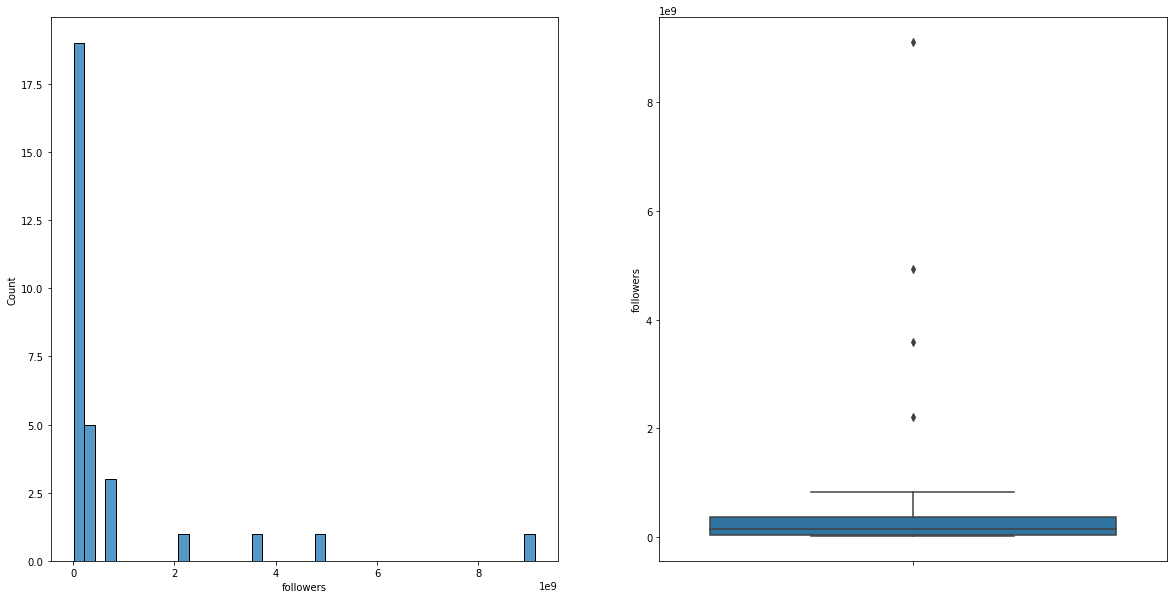

In [63]:
fig,ax=plt.subplots(1,2, figsize=(20,10))
sns.histplot(x='followers', data=df2, ax=ax[0], bins='auto')
sns.boxplot(y='followers', data=df2, ax=ax[1])
plt.show()



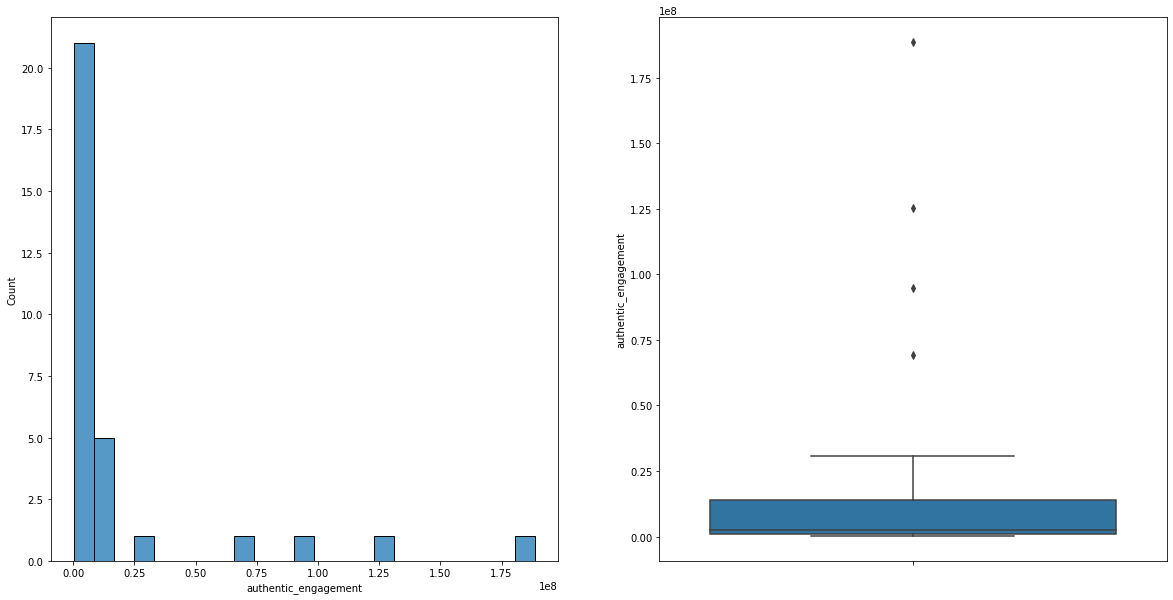

In [62]:
fig,ax=plt.subplots(1,2, figsize=(20,10))
sns.histplot(x='authentic_engagement', data=df2, ax=ax[0], bins='auto')
sns.boxplot(y='authentic_engagement', data=df2, ax=ax[1])
plt.show()

`Las gráficas apoyan nuestras observaciones anteriores, tenemos valores fuera de rango altísimos(sobre todo USA), y la mayoria de nuestros datos se concentran en paises con bajo número de seguidores y bajo número de actividad en la app.`

`Dibujamos histograma para que nos ayude en la interpretación de la grafica boxplot`

Tabla de frecuencias

`Como nuestros datos no son a nivel mundial para cada cuenta, hemos decidido trabajar ahora con el numero de followers, dandoles categoria en vez de valor numérico,aunque seguimos teniendo muestra muy heterogénea de datos aparentemente porque no sabemos en base a que se han seleccionado determinados paises para cada cuenta. Y no encontramos como encontrar homogeneidad sin poder consultarlo.`

In [26]:
def cambiar_followers(col):
    if col<=24500000.0:
        return 'baja'
    elif col >24500000.0 and col<=351050000.0:
        return 'medio'
    else:
        return 'alto'

In [27]:
df['seguidores']=df['followers'].apply(cambiar_followers)

In [28]:
df['seguidores'].value_counts()

baja     739
medio    259
alto       2
Name: seguidores, dtype: int64

a) Variables cualitativas

In [29]:
df_seguidores=df.groupby('seguidores').count().reset_index()
df_seguidores

,seguidores,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
0,alto,2,2,2,2,2,2,2,2,2,2
1,baja,739,739,726,739,655,739,735,739,739,739
2,medio,259,259,255,259,252,259,256,259,259,259


`Vemos que coincide con el vale_counts como esperabamos, tenemos 2 filas, o cuentas de instagram en el rango alto de seguidores, 259 en el rango medio(que hemos fijado entre los percentiles 25 y 75) y 739 en el rango bajo de seguidores (que hemos fijado en el percentil 25)`

b) Variables cuantitativas

In [30]:
df_seguidores2=df.groupby('authentic_engagement').count().reset_index()
df_seguidores2

,authentic_engagement,rank,account,title,link,category,followers,audience_country,engagement_avg,scraped,seguidores
0,0.0,4,4,4,4,3,4,0,4,4,4
1,38300.0,1,1,1,1,1,1,1,1,1,1
2,38600.0,1,1,1,1,1,1,1,1,1,1
3,39200.0,1,1,1,1,1,1,1,1,1,1
4,46600.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
849,8900000.0,1,1,1,1,0,1,0,1,1,1
850,10400000.0,1,1,1,1,0,1,0,1,1,1
851,10600000.0,1,1,1,1,0,1,0,1,1,1
852,11100000.0,1,1,1,1,0,1,1,1,1,1


In [31]:
df_actividad_frec2=df.groupby('followers').count().reset_index()
df_actividad_frec2

,followers,rank,account,title,link,category,audience_country,authentic_engagement,engagement_avg,scraped,seguidores
0,2800000.0,1,1,1,1,0,1,1,1,1,1
1,3100000.0,1,1,1,1,0,1,1,1,1,1
2,3200000.0,3,3,3,3,1,3,3,3,3,3
3,3400000.0,1,1,0,1,1,1,1,1,1,1
4,3500000.0,3,3,3,3,0,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
394,295800000.0,2,2,2,2,2,2,2,2,2,2
395,306300000.0,1,1,1,1,1,1,1,1,1,1
396,308800000.0,1,1,1,1,1,1,1,1,1,1
397,400100000.0,1,1,1,1,1,1,1,1,1,1


c) Frecuencia acumulada

In [32]:
df_seguidores.shape[0]

3

In [33]:
df_seguidores_sin_strings=df_seguidores.drop('seguidores',axis=1)
df_seguidores_sin_strings

,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
0,2,2,2,2,2,2,2,2,2,2
1,739,739,726,739,655,739,735,739,739,739
2,259,259,255,259,252,259,256,259,259,259


In [34]:
frec_relativa_acum_cuali=(df_seguidores_sin_strings/df.shape[0])*100
frec_relativa_acum_cuali

,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,73.9,73.9,72.6,73.9,65.5,73.9,73.5,73.9,73.9,73.9
2,25.9,25.9,25.5,25.9,25.2,25.9,25.6,25.9,25.9,25.9


d) Representación de al menos una tabla de frecuencias

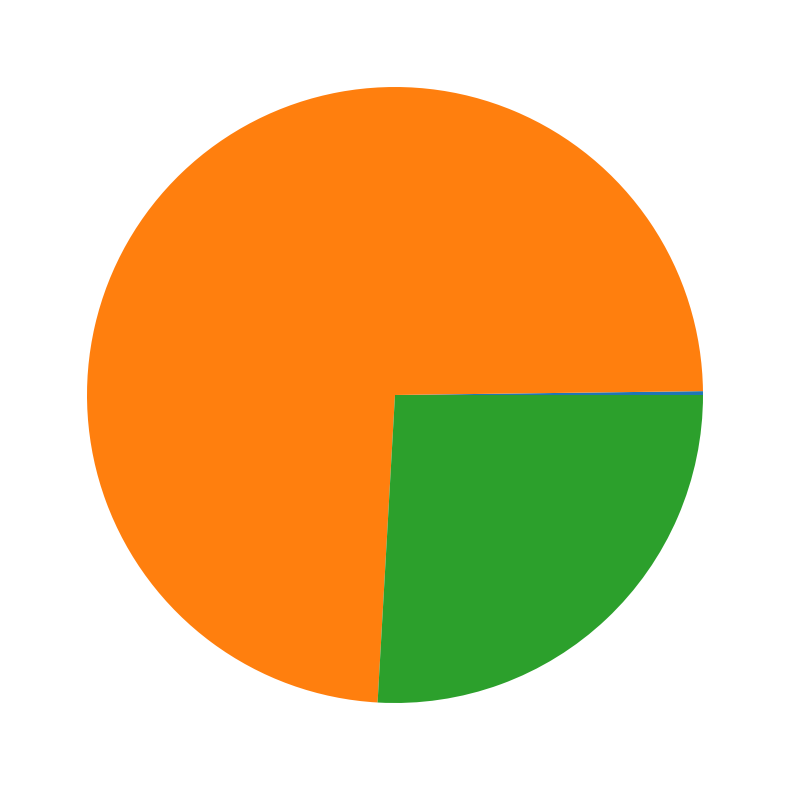

In [35]:
plt.figure(figsize=(20,10))
figure=plt.pie(frec_relativa_acum_cuali['rank'])
plt.show()

### 2.Interpretación de los resultados